In [1]:
from pybaseball import statcast
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import datasets
import seaborn as sns

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [2]:
hitter_stats = pd.read_csv("C:/Users/wei/Documents/碩士/碩一/巨量資料應用專題/bat.csv")

In [3]:
baseball_cols = ['game_date', 'home_team', 'away_team', 'player_name', 'pitcher', 'pitch_type', 'pitch_name', 'release_speed',
                 'batter', 'events', 'description', 'bb_type', 'des', 'launch_speed', 'launch_angle', 'hit_distance_sc','game_year'] 

hitter = hitter_stats[baseball_cols]

In [4]:
hitter

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
0,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.7,543939,strikeout,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
1,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,82.0,543939,NaN,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
2,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,80.8,543939,NaN,called_strike,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
3,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.2,543939,NaN,ball,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
4,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.1,543939,NaN,blocked_ball,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924547,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,KC,Knuckle Curve,84.0,434158,NaN,foul,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924548,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.6,434158,NaN,ball,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924549,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,434158,NaN,ball,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924550,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,KC,Knuckle Curve,82.5,434158,NaN,called_strike,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016


In [5]:
hitter.events.value_counts(dropna=False)

NaN                             2176110
field_out                        296899
strikeout                        164599
single                           107798
walk                              59616
double                            33769
home_run                          24342
force_out                         14880
grounded_into_double_play         14575
hit_by_pitch                       7408
field_error                        5377
sac_fly                            4743
sac_bunt                           3588
triple                             3328
double_play                        1745
fielders_choice                    1489
fielders_choice_out                1238
intent_walk                         951
caught_stealing_2b                  804
strikeout_double_play               600
batter_interference                 163
other_out                           155
catcher_interf                       67
sac_fly_double_play                  67
caught_stealing_3b                   55


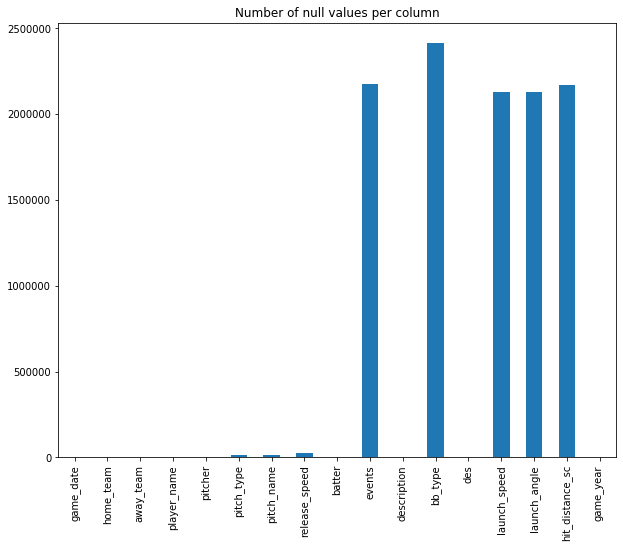

In [6]:
hitter.isnull().sum().plot.bar(figsize=(10, 8));
plt.title('Number of null values per column');

In [7]:
hitter.description.value_counts(dropna=False)

ball                       983382
hit_into_play              514020
foul                       511921
called_strike              489350
swinging_strike            288275
blocked_ball                68740
foul_tip                    24678
swinging_strike_blocked     23297
foul_bunt                    7839
hit_by_pitch                 7408
intent_ball                  3325
missed_bunt                  1711
pitchout                      448
bunt_foul_tip                 153
swinging_pitchout               4
foul_pitchout                   1
Name: description, dtype: int64

In [8]:
null_batted_ball_type = hitter.bb_type.isnull()

In [9]:
hitter[null_batted_ball_type].description.value_counts(dropna=False)

ball                       983382
foul                       511921
called_strike              489350
swinging_strike            288275
blocked_ball                68740
foul_tip                    24678
swinging_strike_blocked     23297
foul_bunt                    7839
hit_by_pitch                 7408
intent_ball                  3325
missed_bunt                  1711
pitchout                      448
bunt_foul_tip                 153
hit_into_play                  42
swinging_pitchout               4
foul_pitchout                   1
Name: description, dtype: int64

In [10]:
hitter.dropna(subset=['bb_type'], inplace=True)

In [11]:
hitter.description.value_counts(dropna=False)

hit_into_play    513978
Name: description, dtype: int64

In [12]:
hitter.events.value_counts(dropna=False)

field_out                    296899
single                       107798
double                        33769
home_run                      24342
force_out                     14880
grounded_into_double_play     14575
field_error                    5377
sac_fly                        4743
sac_bunt                       3588
triple                         3328
double_play                    1745
fielders_choice                1489
fielders_choice_out            1238
batter_interference             110
sac_fly_double_play              67
triple_play                      19
sac_bunt_double_play              5
catcher_interf                    3
game_advisory                     3
Name: events, dtype: int64

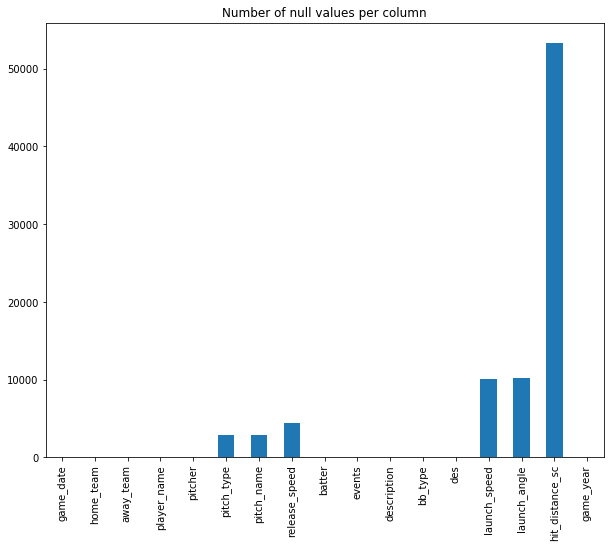

In [13]:
hitter.isnull().sum().plot.bar(figsize=(10, 8));
plt.title('Number of null values per column');

In [14]:
hitter.dropna(subset=['pitch_name', 'release_speed', 'launch_angle','launch_speed'], inplace=True)

In [15]:
hitter.isnull().sum()

game_date              0
home_team              0
away_team              0
player_name            0
pitcher                0
pitch_type             0
pitch_name             0
release_speed          0
batter                 0
events                 0
description            0
bb_type                0
des                    0
launch_speed           0
launch_angle           0
hit_distance_sc    43041
game_year              0
dtype: int64

In [16]:
hitter.events.value_counts(dropna=False)

field_out                    293213
single                       105577
double                        33400
home_run                      24132
force_out                     14409
grounded_into_double_play     14350
field_error                    5280
sac_fly                        4674
triple                         3282
double_play                    1714
fielders_choice                1420
fielders_choice_out            1146
sac_bunt                        717
batter_interference              68
sac_fly_double_play              66
triple_play                      19
catcher_interf                    3
game_advisory                     2
sac_bunt_double_play              1
Name: events, dtype: int64

In [17]:
pd.crosstab(hitter.pitch_type, hitter.game_year, margins=True, margins_name='Total')

game_year,2016,2017,2018,2019,Total
pitch_type,,,,,
CH,14228,14038,14784,15791,58841
CU,9262,8502,8340,9392,35496
EP,22,33,40,12,107
FC,6763,7216,7597,8634,30210
FF,43544,41643,41628,41288,168103
FO,43,46,8,7,104
FS,1919,2100,1796,1765,7580
FT,16919,19646,16589,12620,65774
KC,2264,3189,2887,2318,10658


In [18]:
hitter['pitch_name_low_freq'] = np.where(hitter.pitch_name.isin(['Eephus', 'Fastball', 'Forkball', 'Pitch Out', 'Screwball', 'Unknown']), 1, 0)

In [19]:
hitter_new = hitter[hitter.pitch_name_low_freq == 0]
hitter_new.drop('pitch_name_low_freq', axis=1, inplace=True)

In [20]:
pd.crosstab(hitter_new.pitch_type, hitter_new.game_year, margins=True, margins_name='Total')

game_year,2016,2017,2018,2019,Total
pitch_type,,,,,
CH,14228,14038,14784,15791,58841
CU,9262,8502,8340,9392,35496
FC,6763,7216,7597,8634,30210
FF,43544,41643,41628,41288,168103
FS,1919,2100,1796,1765,7580
FT,16919,19646,16589,12620,65774
KC,2264,3189,2887,2318,10658
KN,745,539,141,29,1454
SI,13068,11344,12575,11531,48518


In [21]:
hitter_new['hit'] = np.where(hitter_new.events.isin(['single','double', 'triple', 'home_run']), 1, 0)

In [22]:
hitter_new['hr'] = hitter_new.events.apply(lambda events: 1 if events == 'home_run' else 0)

In [23]:
hitter_new['xbh'] = np.where(hitter_new.events.isin(['double', 'triple', 'home_run']), 1, 0)

In [24]:
hitter_new.xbh.value_counts(dropna=False)

0    442451
1     60787
Name: xbh, dtype: int64

In [25]:
hitter_new.hr.value_counts(dropna=False)

0    479119
1     24119
Name: hr, dtype: int64

In [26]:
hitter_new.hit.value_counts(dropna=False)

0    336921
1    166317
Name: hit, dtype: int64

In [27]:
hitter_new

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year,hit,hr,xbh
11,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.8,542303,single,hit_into_play,line_drive,Marcell Ozuna singles on a line drive to right...,81.5,13.0,169.0,2019,1,0,0
15,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.5,502671,single,hit_into_play,line_drive,Paul Goldschmidt singles on a line drive to ce...,89.7,18.0,221.0,2019,1,0,0
17,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.0,669242,field_out,hit_into_play,ground_ball,"Tommy Edman grounds out, first baseman Freddie...",77.3,-21.0,7.0,2019,0,0,0
34,2019-10-04,ATL,STL,"Webb, Tyler",643778,FT,2-Seam Fastball,92.0,518692,field_out,hit_into_play,ground_ball,"Freddie Freeman grounds out, first baseman Pau...",84.5,-11.0,13.0,2019,0,0,0
40,2019-10-04,ATL,STL,"Fried, Max",608331,FF,4-Seam Fastball,96.3,451594,field_out,hit_into_play,line_drive,Dexter Fowler lines out sharply to center fiel...,106.4,15.0,351.0,2019,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924533,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,97.9,519058,field_error,hit_into_play,line_drive,Mike Moustakas reaches on a fielding error by ...,105.7,14.0,310.0,2016,0,0,0
2924537,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,96.9,444876,field_out,hit_into_play,ground_ball,"Alcides Escobar grounds out softly, third base...",82.9,-21.0,NaN,2016,0,0,0
2924538,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,493316,field_out,hit_into_play,ground_ball,"Yoenis Cespedes grounds out softly, shortstop ...",62.6,-22.0,7.0,2016,0,0,0
2924541,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,CH,Changeup,87.4,431151,field_out,hit_into_play,ground_ball,"David Wright grounds out, third baseman Mike M...",81.5,2.0,47.0,2016,0,0,0


In [28]:
baseball_correlations = hitter_new.drop(['pitcher', 'batter','game_year','hit','hr','xbh'], axis=1).corr(method='pearson')
baseball_correlations

,release_speed,launch_speed,launch_angle,hit_distance_sc
release_speed,1.000000,0.089709,0.009115,0.018607
launch_speed,0.089709,1.000000,0.121034,0.361586
launch_angle,0.009115,0.121034,1.000000,0.722894
hit_distance_sc,0.018607,0.361586,0.722894,1.000000


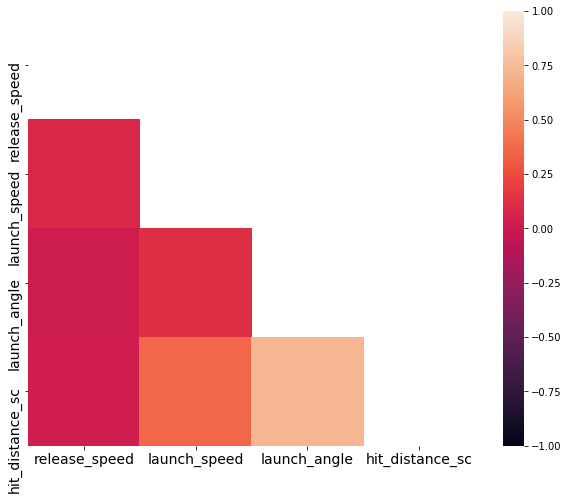

In [29]:
fig, ax = plt.subplots(figsize=(10, 8));

mask = np.zeros_like(baseball_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(baseball_correlations, vmin=-1, vmax=1, mask=mask, ax=ax);

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

plt.show();

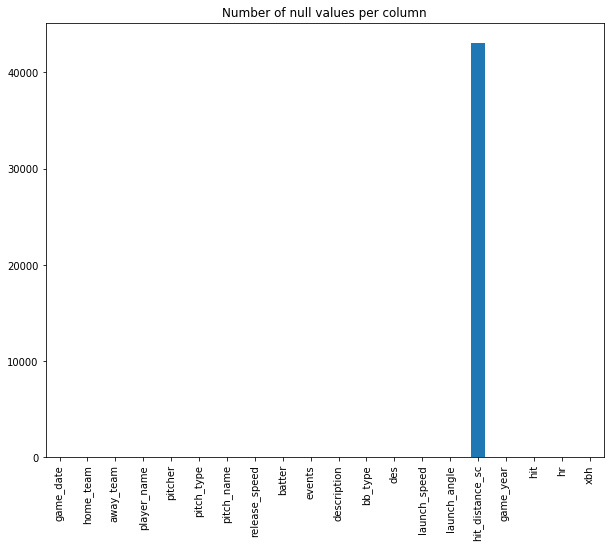

In [30]:
hitter_new.isnull().sum().plot.bar(figsize=(10, 8));
plt.title('Number of null values per column');

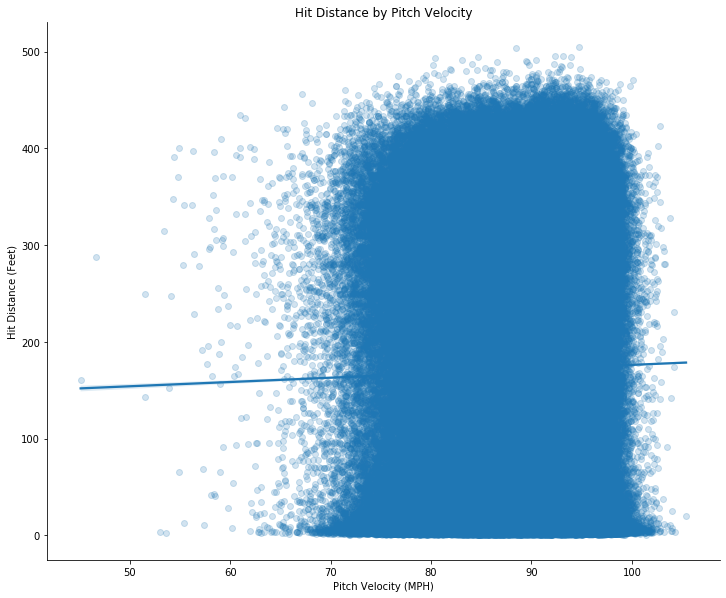

In [31]:
sns.lmplot(x='release_speed', y='hit_distance_sc', data=hitter_new, fit_reg=True, height=8, aspect=10/8, scatter_kws={'alpha':0.2});
plt.xlabel('Pitch Velocity (MPH)');
plt.ylabel('Hit Distance (Feet)');
plt.title('Hit Distance by Pitch Velocity');
plt.show()

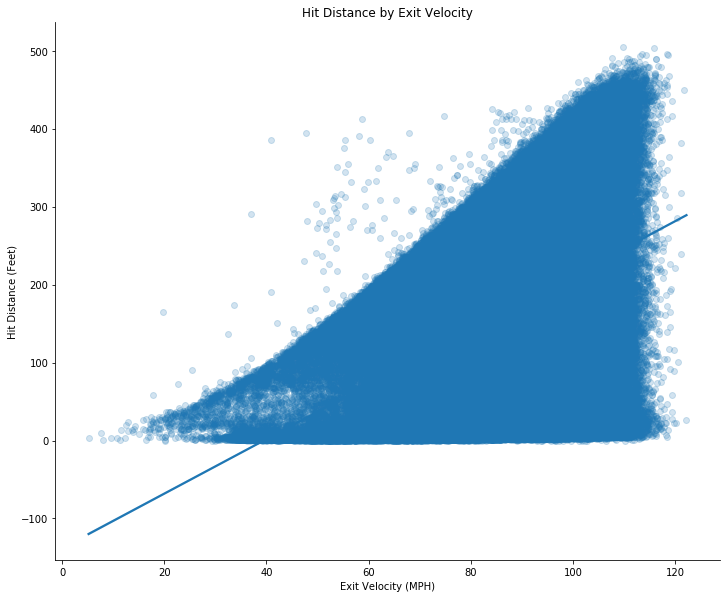

In [32]:
sns.lmplot(x='launch_speed', y='hit_distance_sc', data=hitter_new, fit_reg=True, height=8, aspect=10/8, scatter_kws={'alpha':0.2});
plt.xlabel('Exit Velocity (MPH)');
plt.ylabel('Hit Distance (Feet)');
plt.title('Hit Distance by Exit Velocity');
plt.show()

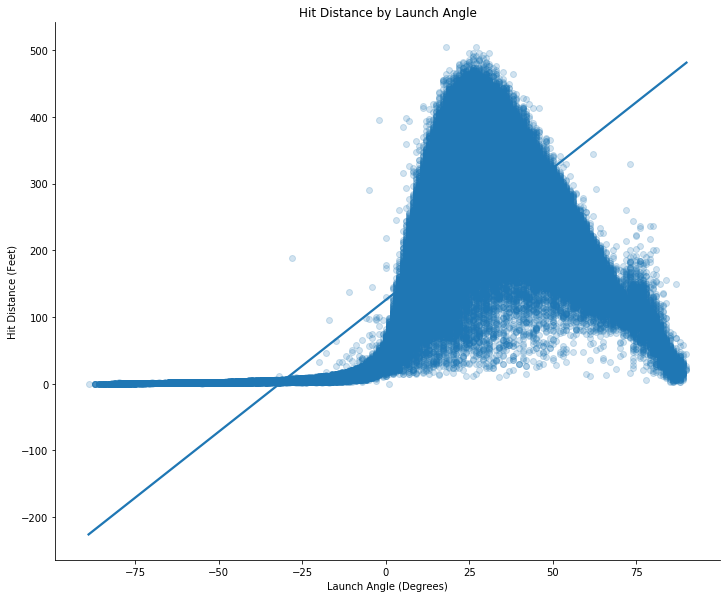

In [33]:
sns.lmplot(x='launch_angle', y='hit_distance_sc', data=hitter_new, fit_reg=True, height=8, aspect=10/8, scatter_kws={'alpha':0.2});
plt.xlabel('Launch Angle (Degrees)');
plt.ylabel('Hit Distance (Feet)');
plt.title('Hit Distance by Launch Angle');

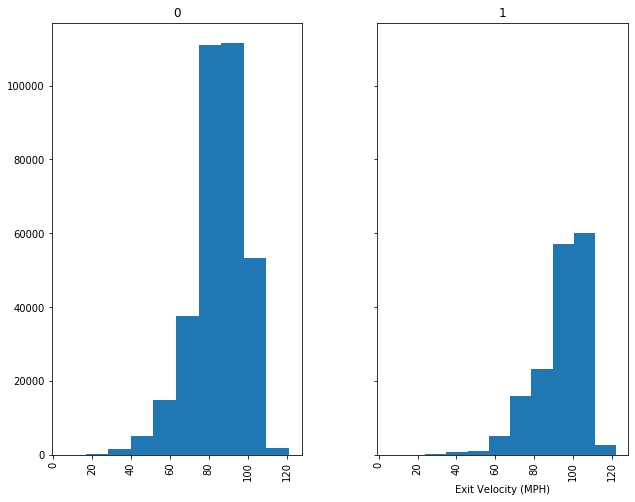

In [34]:
hitter_new.hist(column='launch_speed', by='hit', sharex=True, sharey=True, figsize=(10, 8));
plt.xlabel('Exit Velocity (MPH)');
plt.ylabel('Frequency');

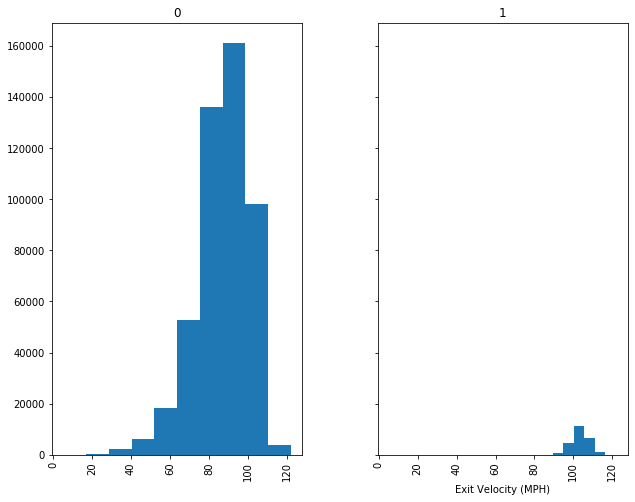

In [35]:
hitter_new.hist(column='launch_speed', by='hr', sharex=True, sharey=True, figsize=(10, 8));
plt.xlabel('Exit Velocity (MPH)');
plt.ylabel('Frequency');

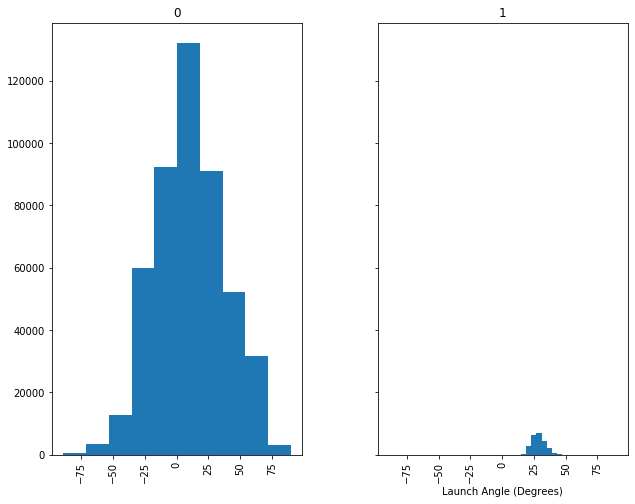

In [36]:
hitter_new.hist(column='launch_angle', by='hr', sharex=True, sharey=True, figsize=(10, 8));
plt.xlabel('Launch Angle (Degrees)');
plt.ylabel('Frequency');

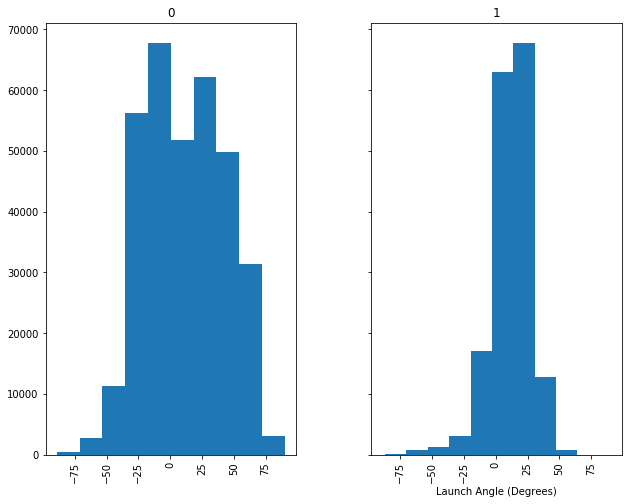

In [37]:
hitter_new.hist(column='launch_angle', by='hit', sharex=True, sharey=True, figsize=(10, 8));
plt.xlabel('Launch Angle (Degrees)');
plt.ylabel('Frequency');

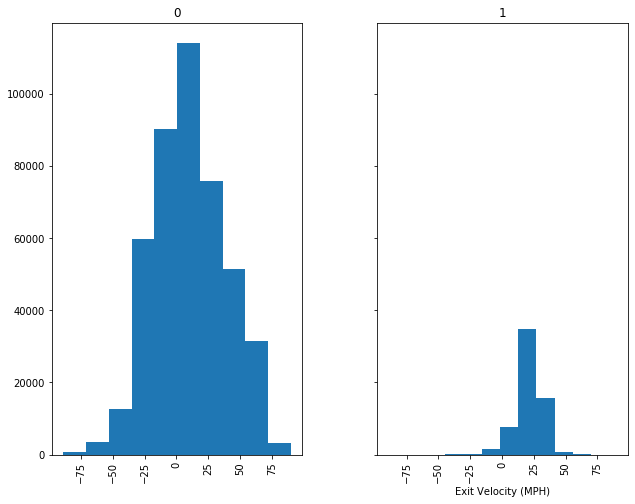

In [38]:
hitter_new.hist(column='launch_angle', by='xbh', sharex=True, sharey=True, figsize=(10, 8));
plt.xlabel('Exit Velocity (MPH)');
plt.ylabel('Frequency');

In [39]:
hitter_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503238 entries, 11 to 2924546
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   game_date        503238 non-null  object 
 1   home_team        503238 non-null  object 
 2   away_team        503238 non-null  object 
 3   player_name      503238 non-null  object 
 4   pitcher          503238 non-null  int64  
 5   pitch_type       503238 non-null  object 
 6   pitch_name       503238 non-null  object 
 7   release_speed    503238 non-null  float64
 8   batter           503238 non-null  int64  
 9   events           503238 non-null  object 
 10  description      503238 non-null  object 
 11  bb_type          503238 non-null  object 
 12  des              503238 non-null  object 
 13  launch_speed     503238 non-null  float64
 14  launch_angle     503238 non-null  float64
 15  hit_distance_sc  460209 non-null  float64
 16  game_year        503238 non-null  in

In [40]:
hitter_new2 = hitter_new.join(pd.get_dummies(hitter.pitch_name, prefix='pitch_name', drop_first=True))
hitter_new2.head()

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,...,pitch_name_Cutter,pitch_name_Eephus,pitch_name_Forkball,pitch_name_Knuckle Curve,pitch_name_Knuckleball,pitch_name_Pitch Out,pitch_name_Screwball,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger
11,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.8,542303,single,...,0,0,0,1,0,0,0,0,0,0
15,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.5,502671,single,...,1,0,0,0,0,0,0,0,0,0
17,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.0,669242,field_out,...,1,0,0,0,0,0,0,0,0,0
34,2019-10-04,ATL,STL,"Webb, Tyler",643778,FT,2-Seam Fastball,92.0,518692,field_out,...,0,0,0,0,0,0,0,0,0,0
40,2019-10-04,ATL,STL,"Fried, Max",608331,FF,4-Seam Fastball,96.3,451594,field_out,...,0,0,0,0,0,0,0,0,0,0


## --------------------------------------------

In [41]:
def prediction(X_test, clf_object): 
  
    # Predict the class labels using the classifier model
    y_pred_class = clf_object.predict(X_test)

    print('Predicted values:')
    print(y_pred_class)
    print('')
    return y_pred_class

In [42]:
def cal_accuracy(y_test1, y_pred_class1, clf_object):
      
    print('Training accuracy score:', round(metrics.accuracy_score(y_train1, clf_object.predict(X_train1)), 4))

    print('Testing accuracy score :', round(metrics.accuracy_score(y_test1, y_pred_class1), 4))
    
    if metrics.accuracy_score(y_train1, clf_object.predict(X_train1)) < metrics.accuracy_score(y_test1, y_pred_class1):
        print('Testing accuracy > Training accuracy')
        print('-> Not overfitting')
    else:
        print('Testing accuracy < Training accuracy')
        print('-> Overfitting!')
    print('')
    
    print('Confusion Matrix:')
    conmat = metrics.confusion_matrix(y_test1, y_pred_class1)
    print(pd.DataFrame(conmat,
                       index=['True No XBH', 'True XBH'],
                       columns=['Predicted No XBH', 'Predicted XBH']))
    print('')
    
    print('Classification Report:')
    print(metrics.classification_report(y_test1, y_pred_class1))
    print('')
    
    # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    print('ROC AUC:', round(metrics.roc_auc_score(y_test1, y_pred_class1), 3))
    print('')
    
    # Log loss, aka logistic loss or cross-entropy loss
    print('Log loss:', round(metrics.log_loss(y_test1, y_pred_class1), 3))

In [43]:
def cal_accuracy2(y_test2, y_pred_class2, clf_object):
      
    print('Training accuracy score:', round(metrics.accuracy_score(y_train2, clf_object.predict(X_train2)), 4))

    print('Testing accuracy score :', round(metrics.accuracy_score(y_test2, y_pred_class2), 4))
    
    if metrics.accuracy_score(y_train2, clf_object.predict(X_train2)) < metrics.accuracy_score(y_test2, y_pred_class2):
        print('Testing accuracy > Training accuracy')
        print('-> Not overfitting')
    else:
        print('Testing accuracy < Training accuracy')
        print('-> Overfitting!')
    print('')
    
    print('Confusion Matrix:')
    conmat = metrics.confusion_matrix(y_test2, y_pred_class2)
    print(pd.DataFrame(conmat,
                       index=['True No HR', 'True HR'],
                       columns=['Predicted No HR', 'Predicted HR']))
    print('')
    
    print('Classification Report:')
    print(metrics.classification_report(y_test2, y_pred_class2))
    print('')
    
    # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    print('ROC AUC:', round(metrics.roc_auc_score(y_test2, y_pred_class2), 3))
    print('')
    
    # Log loss, aka logistic loss or cross-entropy loss
    print('Log loss:', round(metrics.log_loss(y_test2, y_pred_class2), 3))

In [44]:
def cal_accuracy3(y_test, y_pred_class, clf_object):
      
    print('Training accuracy score:', round(metrics.accuracy_score(y_train, clf_object.predict(X_train)), 4))

    print('Testing accuracy score :', round(metrics.accuracy_score(y_test, y_pred_class), 4))
    
    if metrics.accuracy_score(y_train, clf_object.predict(X_train)) < metrics.accuracy_score(y_test, y_pred_class):
        print('Testing accuracy > Training accuracy')
        print('-> Not overfitting')
    else:
        print('Testing accuracy < Training accuracy')
        print('-> Overfitting!')
    print('')
    
    print('Confusion Matrix:')
    conmat = metrics.confusion_matrix(y_test, y_pred_class)
    print(pd.DataFrame(conmat,
                       index=['Not Hit', 'Hit'],
                       columns=['Predicted Not Hit', 'Predicted Hit']))
    print('')
    
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred_class))
    print('')
    
    # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    print('ROC AUC:', round(metrics.roc_auc_score(y_test, y_pred_class), 3))
    print('')
    
    # Log loss, aka logistic loss or cross-entropy loss
    print('Log loss:', round(metrics.log_loss(y_test, y_pred_class), 3))

In [45]:
hitter_new2['pitch_name_num'] = hitter_new2.pitch_name.map({'4-Seam Fastball':1, '2-Seam Fastball':2, 'Slider':3, 'Changeup':4, 'Sinker':5, 'Curveball':6, 'Cutter':7, 'Knuckle Curve':8, 'Split-Finger':9, 'Knuckleball':10})

In [46]:
hitter_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503238 entries, 11 to 2924546
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   game_date        503238 non-null  object 
 1   home_team        503238 non-null  object 
 2   away_team        503238 non-null  object 
 3   player_name      503238 non-null  object 
 4   pitcher          503238 non-null  int64  
 5   pitch_type       503238 non-null  object 
 6   pitch_name       503238 non-null  object 
 7   release_speed    503238 non-null  float64
 8   batter           503238 non-null  int64  
 9   events           503238 non-null  object 
 10  description      503238 non-null  object 
 11  bb_type          503238 non-null  object 
 12  des              503238 non-null  object 
 13  launch_speed     503238 non-null  float64
 14  launch_angle     503238 non-null  float64
 15  hit_distance_sc  460209 non-null  float64
 16  game_year        503238 non-null  in

In [47]:
feature_cols = ['pitch_name_num','release_speed', 'launch_speed', 'launch_angle','xbh','hr']

In [48]:
hitter_new2

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,...,pitch_name_Eephus,pitch_name_Forkball,pitch_name_Knuckle Curve,pitch_name_Knuckleball,pitch_name_Pitch Out,pitch_name_Screwball,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger,pitch_name_num
11,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.8,542303,single,...,0,0,1,0,0,0,0,0,0,8
15,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.5,502671,single,...,0,0,0,0,0,0,0,0,0,7
17,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.0,669242,field_out,...,0,0,0,0,0,0,0,0,0,7
34,2019-10-04,ATL,STL,"Webb, Tyler",643778,FT,2-Seam Fastball,92.0,518692,field_out,...,0,0,0,0,0,0,0,0,0,2
40,2019-10-04,ATL,STL,"Fried, Max",608331,FF,4-Seam Fastball,96.3,451594,field_out,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924533,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,97.9,519058,field_error,...,0,0,0,0,0,0,0,0,0,1
2924537,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,96.9,444876,field_out,...,0,0,0,0,0,0,0,0,0,1
2924538,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,493316,field_out,...,0,0,0,0,0,0,1,0,0,5
2924541,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,CH,Changeup,87.4,431151,field_out,...,0,0,0,0,0,0,0,0,0,4


In [49]:
X = hitter_new2[feature_cols]
y = hitter_new2.hit

In [50]:
hitter_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503238 entries, 11 to 2924546
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   game_date                   503238 non-null  object 
 1   home_team                   503238 non-null  object 
 2   away_team                   503238 non-null  object 
 3   player_name                 503238 non-null  object 
 4   pitcher                     503238 non-null  int64  
 5   pitch_type                  503238 non-null  object 
 6   pitch_name                  503238 non-null  object 
 7   release_speed               503238 non-null  float64
 8   batter                      503238 non-null  int64  
 9   events                      503238 non-null  object 
 10  description                 503238 non-null  object 
 11  bb_type                     503238 non-null  object 
 12  des                         503238 non-null  object 
 13  launch_speed

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV

In [52]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65)

## 預測安打

In [54]:
rf_gini1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=46)
rf_gini1.fit(X_train, y_train)

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=46, verbose=0,
                       warm_start=False)

In [55]:
y_pred_class = rf_gini1.predict(X_test)
y_pred_class

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


array([0, 0, 0, ..., 0, 0, 0])

In [56]:
y_pred_prob = rf_gini1.predict_proba(X_test)[:, 1]
y_pred_prob = rf_gini1.predict_proba(X_test)
y_pred_prob

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

array([[0.70479553, 0.29520447],
       [0.90398832, 0.09601168],
       [0.70169855, 0.29830145],
       ...,
       [0.59196952, 0.40803048],
       [0.6884269 , 0.3115731 ],
       [0.89333604, 0.10666396]])

In [57]:
print('Results Using Gini Index:')
y_pred_gini = prediction(X_test, rf_gini1)
cal_accuracy3(y_test, y_pred_gini, rf_gini1)

Results Using Gini Index:


C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Predicted values:
[0 0 0 ... 0 0 0]



C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Training accuracy score: 0.7898
Testing accuracy score : 0.7914


C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Testing accuracy > Training accuracy
-> Not overfitting

Confusion Matrix:
         Predicted Not Hit  Predicted Hit
Not Hit             101275              0
Hit                  31497          18200

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87    101275
           1       1.00      0.37      0.54     49697

    accuracy                           0.79    150972
   macro avg       0.88      0.68      0.70    150972
weighted avg       0.84      0.79      0.76    150972


ROC AUC: 0.683

Log loss: 7.206


In [58]:
X_test

,pitch_name_num,release_speed,launch_speed,launch_angle,xbh,hr
995982,8,83.6,88.7,11.0,0,0
2749099,10,77.0,80.0,69.0,0,0
1527852,1,92.2,85.0,19.0,0,0
2653176,2,91.9,90.5,-18.0,0,0
1781703,4,82.4,87.6,28.0,0,0
...,...,...,...,...,...,...
72132,2,93.5,87.4,-43.0,0,0
506161,4,80.2,81.0,29.0,0,0
2350650,1,90.3,99.8,8.0,0,0
2523049,1,92.9,96.7,15.0,0,0


# text檔+預測常打

In [59]:
pre_data2 = pd.DataFrame(np.column_stack((X_test, y_pred_class)),columns=['pitch_name_num','release_speed','launch_speed','launch_angle','xbh','hr','predict_hit'])

In [60]:
pre_data2

,pitch_name_num,release_speed,launch_speed,launch_angle,xbh,hr,predict_hit
0,8.0,83.6,88.7,11.0,0.0,0.0,0.0
1,10.0,77.0,80.0,69.0,0.0,0.0,0.0
2,1.0,92.2,85.0,19.0,0.0,0.0,0.0
3,2.0,91.9,90.5,-18.0,0.0,0.0,0.0
4,4.0,82.4,87.6,28.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
150967,2.0,93.5,87.4,-43.0,0.0,0.0,0.0
150968,4.0,80.2,81.0,29.0,0.0,0.0,0.0
150969,1.0,90.3,99.8,8.0,0.0,0.0,0.0
150970,1.0,92.9,96.7,15.0,0.0,0.0,0.0


In [100]:
fit = (pre_data2['predict_hit'] ==1)

In [101]:
pre_data2[fit] 

,pitch_name_num,release_speed,launch_speed,launch_angle,xbh,hr,predict_hit
15,5.0,92.4,93.9,4.0,1.0,0.0,1.0
22,5.0,93.8,106.2,21.0,1.0,0.0,1.0
31,5.0,90.1,109.4,20.0,1.0,0.0,1.0
69,7.0,90.5,107.6,23.0,1.0,1.0,1.0
71,7.0,85.7,101.3,31.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
150926,1.0,94.5,102.6,21.0,1.0,0.0,1.0
150938,4.0,87.7,102.1,15.0,1.0,0.0,1.0
150950,2.0,91.7,101.0,10.0,1.0,0.0,1.0
150951,3.0,86.8,99.5,6.0,1.0,0.0,1.0


In [104]:
feature_cols = ['pitch_name_num','release_speed', 'launch_speed', 'launch_angle','hr']
X1 = pre_data2[fit][feature_cols]
y1 = pre_data2[fit].xbh

In [105]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.70, test_size=0.30, random_state=65)

In [106]:
rf_gini2 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=46)
rf_gini2.fit(X_train1, y_train1)

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=46, verbose=0,
                       warm_start=False)

In [107]:
y_pred_class1 = rf_gini2.predict(X_test1)
y_pred_class1

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


array([1., 1., 1., ..., 1., 1., 1.])

In [108]:
y_pred_prob1 = rf_gini2.predict_proba(X_test1)[:, 1]
y_pred_prob1 = rf_gini2.predict_proba(X_test1)
y_pred_prob1

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


IndexError: index 1 is out of bounds for axis 1 with size 1

In [109]:
print('Results Using Gini Index:')
y_pred_gini1 = prediction(X_test1, rf_gini2)
cal_accuracy(y_test1, y_pred_gini1, rf_gini2)

Results Using Gini Index:
Predicted values:
[1. 1. 1. ... 1. 1. 1.]

Training accuracy score: 1.0
Testing accuracy score : 1.0
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:


C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

ValueError: Shape of passed values is (1, 1), indices imply (2, 2)

In [69]:
X_test1

,pitch_name_num,release_speed,launch_speed,launch_angle,hr
78773,3.0,90.9,89.3,31.0,0.0
82629,5.0,91.5,86.9,0.0,0.0
16788,1.0,94.8,37.0,-31.0,0.0
108559,2.0,90.0,94.9,22.0,0.0
105840,1.0,95.4,113.3,15.0,0.0
...,...,...,...,...,...
135165,6.0,80.1,90.2,16.0,0.0
128630,6.0,76.5,91.8,16.0,0.0
26845,5.0,92.9,68.6,-12.0,0.0
116448,2.0,91.9,80.0,69.0,0.0


In [70]:
pre_data3 = pd.DataFrame(np.column_stack((X_test1, y_pred_class1)),columns=['pitch_name_num','release_speed','launch_speed','launch_angle','hr','predict_xbh'])

In [71]:
pre_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45292 entries, 0 to 45291
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pitch_name_num  45292 non-null  float64
 1   release_speed   45292 non-null  float64
 2   launch_speed    45292 non-null  float64
 3   launch_angle    45292 non-null  float64
 4   hr              45292 non-null  float64
 5   predict_xbh     45292 non-null  float64
dtypes: float64(6)
memory usage: 2.1 MB


In [72]:
fit = (pre_data3['hr'] ==1)

In [73]:
pre_data3[fit].head() 

,pitch_name_num,release_speed,launch_speed,launch_angle,hr,predict_xbh
16,4.0,86.3,103.4,37.0,1.0,1.0
37,7.0,93.2,110.0,26.0,1.0,1.0
38,7.0,87.3,104.6,29.0,1.0,1.0
82,4.0,78.6,100.7,28.0,1.0,1.0
89,1.0,93.4,105.7,29.0,1.0,1.0


In [74]:
feature_cols = ['pitch_name_num','release_speed', 'launch_speed', 'launch_angle']

In [75]:
pre_data3

,pitch_name_num,release_speed,launch_speed,launch_angle,hr,predict_xbh
0,3.0,90.9,89.3,31.0,0.0,0.0
1,5.0,91.5,86.9,0.0,0.0,0.0
2,1.0,94.8,37.0,-31.0,0.0,0.0
3,2.0,90.0,94.9,22.0,0.0,0.0
4,1.0,95.4,113.3,15.0,0.0,0.0
...,...,...,...,...,...,...
45287,6.0,80.1,90.2,16.0,0.0,0.0
45288,6.0,76.5,91.8,16.0,0.0,0.0
45289,5.0,92.9,68.6,-12.0,0.0,0.0
45290,2.0,91.9,80.0,69.0,0.0,0.0


In [76]:
X2 = pre_data3[feature_cols]
y2 = pre_data3.hr

In [77]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.70, test_size=0.30, random_state=65)

In [78]:
rf_gini3 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=46)
rf_gini3.fit(X_train2, y_train2)

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=46, verbose=0,
                       warm_start=False)

In [79]:
y_pred_class2 = rf_gini3.predict(X_test2)
y_pred_class2

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


array([0., 0., 0., ..., 0., 0., 0.])

In [80]:
y_pred_prob2 = rf_gini3.predict_proba(X_test2)[:, 1]
y_pred_prob2 = rf_gini3.predict_proba(X_test2)
y_pred_prob2

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

array([[0.99022608, 0.00977392],
       [0.94448135, 0.05551865],
       [0.99885579, 0.00114421],
       ...,
       [0.9986476 , 0.0013524 ],
       [0.97377817, 0.02622183],
       [0.97336105, 0.02663895]])

In [81]:
print('Results Using Gini Index:')
y_pred_gini2 = prediction(X_test2, rf_gini3)
cal_accuracy2(y_test2, y_pred_gini2, rf_gini3)

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Results Using Gini Index:
Predicted values:
[0. 0. 0. ... 0. 0. 0.]

Training accuracy score: 0.9668


C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

Testing accuracy score : 0.9628
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
            Predicted No HR  Predicted HR
True No HR            12883            36
True HR                 469           200

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     12919
         1.0       0.85      0.30      0.44       669

    accuracy                           0.96     13588
   macro avg       0.91      0.65      0.71     13588
weighted avg       0.96      0.96      0.95     13588


ROC AUC: 0.648

Log loss: 1.284


In [82]:
from sklearn.dummy import DummyClassifier, DummyRegressor

In [83]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train2, y_train2)
dummy_clf.score(X_test2, y_test2)
print('Baseline accuracy in test dataset:', round(dummy_clf.score(X_test2, y_test2), 3))

Baseline accuracy in test dataset: 0.951


In [84]:
X_train2 = X_train2.values
X_test2 = X_test2.values
y_train2 = y_train2.values
y_test2 = y_test2.values

In [85]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=46)
clf_entropy.fit(X_train2, y_train2)

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=46, splitter='best')

In [86]:
y_pred_class5 = clf_entropy.predict(X_test2)
y_pred_class5

array([0., 0., 0., ..., 0., 0., 0.])

In [87]:
y_pred_prob5 = clf_entropy.predict_proba(X_test2)[:, 1]
y_pred_prob5 = clf_entropy.predict_proba(X_test2)
y_pred_prob5

array([[9.99843113e-01, 1.56887355e-04],
       [9.99843113e-01, 1.56887355e-04],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00],
       [9.99843113e-01, 1.56887355e-04],
       [9.99843113e-01, 1.56887355e-04]])

In [88]:
def prediction3(X_test2, clf_object): 
  
    # Predict the class labels using the classifier model
    y_pred_class5 = clf_object.predict(X_test2)

    print('Predicted values:')
    print(y_pred_class5)
    print('')
    return y_pred_class5

In [89]:
def cal_accuracy4(y_test2, y_pred_class5, clf_object):
      
    # Training accuracy classification score
    print('Training accuracy score:', round(metrics.accuracy_score(y_train2, clf_object.predict(X_train2)), 4))
    
    # Testing accuracy classification score
    print('Testing accuracy score :', round(metrics.accuracy_score(y_test2, y_pred_class5), 4))
    
    if metrics.accuracy_score(y_train2, clf_object.predict(X_train2)) < metrics.accuracy_score(y_test2, y_pred_class5):
        print('Testing accuracy > Training accuracy')
        print('-> Not overfitting')
    else:
        print('Testing accuracy < Training accuracy')
        print('-> Overfitting!')
    print('')
    
    # Confusion matrix to evaluate the accuracy of a classification
    print('Confusion Matrix:')
    conmat = metrics.confusion_matrix(y_test2, y_pred_class5)
    print(pd.DataFrame(conmat,
                       index=['True No HR', 'True HR'],
                       columns=['Predicted No HR', 'Predicted HR']))
    print('')
    
    # Build a text report showing the main classification metrics
    print('Classification Report:')
    print(metrics.classification_report(y_test2, y_pred_class5))
    print('')
    
    # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    print('ROC AUC:', round(metrics.roc_auc_score(y_test2, y_pred_class5), 3))
    print('')
    
    # Log loss, aka logistic loss or cross-entropy loss
    print('Log loss:', round(metrics.log_loss(y_test2, y_pred_class5), 3))

In [90]:
print('Results Using entropy Index:')
y_pred_entropy = prediction3(X_test2, clf_entropy)
cal_accuracy4(y_test2, y_pred_entropy, clf_entropy)

Results Using entropy Index:
Predicted values:
[0. 0. 0. ... 0. 0. 0.]

Training accuracy score: 0.9684
Testing accuracy score : 0.9655
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
            Predicted No HR  Predicted HR
True No HR            12709           210
True HR                 259           410

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     12919
         1.0       0.66      0.61      0.64       669

    accuracy                           0.97     13588
   macro avg       0.82      0.80      0.81     13588
weighted avg       0.96      0.97      0.96     13588


ROC AUC: 0.798

Log loss: 1.192


In [91]:
clf_entropy

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=46, splitter='best')

In [92]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.75, test_size=0.25, random_state=65)

In [93]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=46)
clf_entropy.fit(X_train2, y_train2)

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=46, splitter='best')

In [94]:
print('Results Using entropy Index:')
y_pred_entropy = prediction3(X_test2, clf_entropy)
cal_accuracy4(y_test2, y_pred_entropy, clf_entropy)

Results Using entropy Index:
Predicted values:
[0. 0. 0. ... 0. 0. 0.]

Training accuracy score: 0.968
Testing accuracy score : 0.966
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
            Predicted No HR  Predicted HR
True No HR            10605           169
True HR                 216           333

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     10774
         1.0       0.66      0.61      0.63       549

    accuracy                           0.97     11323
   macro avg       0.82      0.80      0.81     11323
weighted avg       0.96      0.97      0.97     11323


ROC AUC: 0.795

Log loss: 1.174


In [95]:
from sklearn.tree import export_graphviz

In [96]:
hitter_new.hist(column='exit_velocity', by='hr', sharex=True, sharey=True, figsize=(10, 8));
plt.xlabel('Exit Velocity (MPH)');
plt.ylabel('Frequency');

KeyError: 'Column not found: exit_velocity'